In [1]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

2025-05-12 23:05:11,942 - INFO - Connecting to SGSA100 (RohdeSchwarzSGS100A)


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114907, firmware:4.2.366.0-5.00.232.72) in 0.11s


2025-05-12 23:05:12,057 - INFO - Successfully connected to SGSA100
2025-05-12 23:05:12,058 - INFO - Successfully connected to zi


[2025.05.12 23:05:12.062] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.05.12 23:05:12.064] INFO    VERSION: laboneq 2.51.0
[2025.05.12 23:05:12.066] INFO    Connecting to data server at localhost:8004
[2025.05.12 23:05:12.075] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.05.12 23:05:12.081] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.05.12 23:05:12.084] INFO    Configuring the device setup
[2025.05.12 23:05:12.092] INFO    The device setup is configured


2025-05-12 23:05:12,095 - INFO - Turning on local oscillators before experiment


[2025.05.12 23:05:12.104] INFO    Starting LabOne Q Compiler run...
[2025.05.12 23:05:12.120] INFO    Schedule completed. [0.013 s]
[2025.05.12 23:05:12.149] INFO    Code generation completed for all AWGs. [0.029 s]
[2025.05.12 23:05:12.150] INFO    Completed compilation step 1 of 1. [0.044 s]
[2025.05.12 23:05:12.155] INFO     ─────────────────────────────────────────────────────────────────────── 
[2025.05.12 23:05:12.157] INFO      Device              AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.05.12 23:05:12.158] INFO     ─────────────────────────────────────────────────────────────────────── 
[2025.05.12 23:05:12.159] INFO      SHFQC_dev12183        0         21            0           1      8000  
[2025.05.12 23:05:12.159] INFO      SHFQC_dev12183_sg     0          4            1           0         0  
[2025.05.12 23:05:12.161] INFO     ─────────────────────────────────────────────────────────────────────── 
[2025.05.12 23:05:12.161] INFO      TOTAL                

2025-05-12 23:05:13,237 - INFO - Turning off local oscillators after experiment


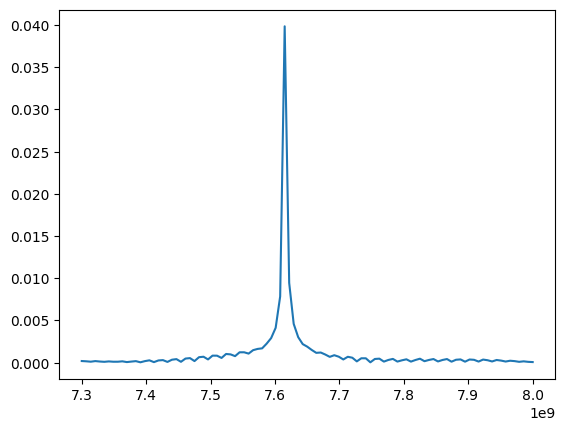

In [2]:
from rr_spec import RRSpec

rr_spec = RRSpec()
result = rr_spec.run(0, np.linspace(7.3e9, 8e9, 101))

In [ ]:
from sqil_core.experiment.data.plottr import DataDict, DDH5Writer
from plottr.data.datadict import DataDict
import numpy as np

# Create a DataDict with explicit 1D configuration
datadict = DataDict(
    ro_freq=dict(unit="Hz"),               # Axis: ro_freq as 1D
    data=dict(axes=["ro_freq"], unit=""),   # Data: associated with ro_freq
)
datadict.validate()

# Simulated 1D data
ro_freq = np.linspace(1e9, 2e9, 101)  # 1D array
raw_data = np.random.rand(101)        # 1D array

# Enforce 1D shape explicitly
ro_freq = np.atleast_1d(ro_freq)  # Ensure it's 1D
raw_data = np.atleast_1d(raw_data)  # Ensure it's 1D

# Adding data to the writer
with DDH5Writer(datadict, "data", name="culo") as writer:
    writer.add_data(ro_freq=ro_freq)
    writer.add_data(data=raw_data)

print("Data successfully added to DataDict")

Data successfully added to DataDict


In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data\2025-05-12\00000-culo_2025-05-12T230806"
data, freq = sqil.extract_h5_data(path, ["data", "ro_freq"])

data.shape, freq.shape

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data\2025-05-12\data.ddh5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-12\00009-rr spectroscopy_2025-05-12T225744"

data = sqil.extract_h5_data(path, ["data"])

# plt.plot(freq, np.abs(data))
# plt.show()


data

(array([[-1.10598727e-04+1.61478637e-04j,  1.58333546e-04+1.08540357e-05j,
         -9.45245372e-05-4.44815480e-05j,  6.12929542e-05+1.76132820e-04j,
          8.86818408e-05-8.83400490e-05j, -8.21884873e-05+5.80233746e-05j,
          1.27801691e-04+8.32845750e-05j,  1.10918165e-05-1.08661920e-04j,
         -2.65334713e-05+1.03559537e-04j,  1.56602406e-04+9.91937995e-06j,
         -3.22273880e-05-5.65503930e-05j,  4.56535230e-05+1.25300646e-04j,
          1.74294583e-04-4.55840344e-05j, -2.69516335e-05-4.00481175e-05j,
          1.44172294e-04+1.07352387e-04j,  1.71236523e-04-2.10297444e-04j,
         -5.97740183e-05+9.13579602e-06j,  2.52482685e-04-5.07143265e-05j,
         -6.57916218e-05-2.96722779e-04j, -4.61199583e-05+6.73448797e-05j,
          2.12670555e-04-2.72653268e-04j, -3.48764314e-04-2.32884211e-04j,
          5.78286648e-05+8.76488311e-05j, -1.01512281e-04-4.78294998e-04j,
         -5.15220788e-04+1.50195928e-04j,  1.96338381e-04+4.27854763e-05j,
         -5.71799125e-04-

In [ ]:
from plottr.data.datadict import DataDict
import numpy as np

# Create a DataDict with explicit 1D configuration
datadict = DataDict(
    ro_freq=dict(unit="Hz"),  # Axis: ro_freq as 1D
    data=dict(axes=["ro_freq"], unit=""),  # Data: associated with ro_freq
)
datadict.validate()

# Simulated 1D data
ro_freq = np.linspace(1e9, 2e9, 101)  # 1D array
raw_data = np.random.rand(101)  # 1D array

# Enforce 1D shape explicitly
ro_freq = np.atleast_1d(ro_freq)  # Ensure it's 1D
raw_data = np.atleast_1d(raw_data)  # Ensure it's 1D

# Adding data to the writer
writer.add_data(ro_freq=ro_freq, data=raw_data)
print("Data successfully added to DataDict")